In [1]:
%matplotlib inline
import lxml.html
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import seaborn as sns
import japanize_matplotlib
from bs4 import BeautifulSoup

In [2]:
# コーヒーメーカートップ画面取得（製品数の確認）
url="https://kakaku.com/kaden/coffee-maker/itemlist.aspx"
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")
count = soup.find(class_="result").span.text

In [3]:
# 製品数からページ数の判定
pages = int(count)//40

if int(count)%40 != 0:
    pages += 1 
print(pages)

6


In [4]:
# 各ページからデータダウンロード
page_url_base = "https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg="

res = []
for i in range(1,pages+1):
    page_url = page_url_base + str(i)
    print(page_url)
    res.append(requests.get(page_url))
    time.sleep(1)

https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg=1
https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg=2
https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg=3
https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg=4
https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg=5
https://kakaku.com/kaden/coffee-maker/itemlist.aspx?pdf_pg=6


In [89]:
# DataFrameにデータを格納
coffeeMaker = pd.DataFrame()

for page in range(len(res)):
    soup = BeautifulSoup(res[page].text,"lxml")
    elems = soup.find_all(class_="tr-border")
    ci = soup.find_all(class_="ckitanker")
    pr = soup.find_all(class_="pryen")
    #注目ランキング
    rk1 = soup.find_all(class_="swrank1")
    #売れ筋ランキング
    rk2 = soup.find_all(class_="swrank2")
    length = (len(elems)-2)//3
    lenCi = len(ci)
    lenPr = len(pr)
    lenRk1 = len(rk1) - 4
    lenRk2 = len(rk2) - 4
    
    df = pd.DataFrame()
    df['maker'] = [ci[i].text.split('\u3000')[0] for i in range(lenCi)]
    df['product'] = [ci[i].text.split('\u3000')[1] for i in range(lenCi)]
    df['price'] = [int(pr[i].text.replace(',','')[1:]) for i in range(lenPr)]
    df['at_rank'] = [rk1[i+4].text.replace('位','').replace('-','') for i in range(lenRk1)]
    df['sell_rank'] = [rk2[i+4].text.replace('位','').replace('-','') for i in range(lenRk2)]
    df['sell_rank2'] = [int(rk2[i+4].text.replace('位','').replace('-','9999999')) for i in range(lenRk2)]
    type_list = []
    coffee_list = []
    espresso_list = []
    cappuccino_list = []
    capacity_list = []
    review_list = []
    
    if page == 5:
        for i in range(length+1):
            if i <= 21:
                type_list.append(elems[i*3+3].find_all("td")[8].text)
                coffee_list.append(elems[i*3+3].find_all("td")[9].text)
                espresso_list.append(elems[i*3+3].find_all("td")[10].text)
                cappuccino_list.append(elems[i*3+3].find_all("td")[11].text)
                capacity_list.append(elems[i*3+3].find_all("td")[12].text.split('杯')[0])
                review_list.append(elems[i*3+3].find_all("td")[4].text.split('(')[0])
            else:
                type_list.append(elems[i*3+2].find_all("td")[8].text)
                coffee_list.append(elems[i*3+2].find_all("td")[9].text)
                espresso_list.append(elems[i*3+2].find_all("td")[10].text)
                cappuccino_list.append(elems[i*3+2].find_all("td")[11].text)
                capacity_list.append(elems[i*3+2].find_all("td")[12].text.split('杯')[0])
                review_list.append(elems[i*3+2].find_all("td")[4].text.split('(')[0])
    elif page == 4:
        for i in range(length+1):
            if i <= 14:
                type_list.append(elems[i*3+3].find_all("td")[8].text)
                coffee_list.append(elems[i*3+3].find_all("td")[9].text)
                espresso_list.append(elems[i*3+3].find_all("td")[10].text)
                cappuccino_list.append(elems[i*3+3].find_all("td")[11].text)
                capacity_list.append(elems[i*3+3].find_all("td")[12].text.split('杯')[0])
                review_list.append(elems[i*3+3].find_all("td")[4].text.split('(')[0])
            elif i <= 31:
                type_list.append(elems[i*3+2].find_all("td")[8].text)
                coffee_list.append(elems[i*3+2].find_all("td")[9].text)
                espresso_list.append(elems[i*3+2].find_all("td")[10].text)
                cappuccino_list.append(elems[i*3+2].find_all("td")[11].text)
                capacity_list.append(elems[i*3+2].find_all("td")[12].text.split('杯')[0])
                review_list.append(elems[i*3+2].find_all("td")[4].text.split('(')[0])
            elif i <= 35:
                type_list.append(elems[i*3+1].find_all("td")[8].text)
                coffee_list.append(elems[i*3+1].find_all("td")[9].text)
                espresso_list.append(elems[i*3+1].find_all("td")[10].text)
                cappuccino_list.append(elems[i*3+1].find_all("td")[11].text)
                capacity_list.append(elems[i*3+1].find_all("td")[12].text.split('杯')[0])
                review_list.append(elems[i*3+1].find_all("td")[4].text.split('(')[0])
            else:
                type_list.append(elems[i*3].find_all("td")[8].text)
                coffee_list.append(elems[i*3].find_all("td")[9].text)
                espresso_list.append(elems[i*3].find_all("td")[10].text)
                cappuccino_list.append(elems[i*3].find_all("td")[11].text)
                capacity_list.append(elems[i*3].find_all("td")[12].text.split('杯')[0])
                review_list.append(elems[i*3].find_all("td")[4].text.split('(')[0])
    else:
        for i in range(length):
            type_list.append(elems[i*3+3].find_all("td")[8].text)
            coffee_list.append(elems[i*3+3].find_all("td")[9].text)
            espresso_list.append(elems[i*3+3].find_all("td")[10].text)
            cappuccino_list.append(elems[i*3+3].find_all("td")[11].text)
            capacity_list.append(elems[i*3+3].find_all("td")[12].text.split('杯')[0])
            review_list.append(elems[i*3+3].find_all("td")[4].text.split('(')[0])

    df['type'] = type_list
    df['coffee'] = coffee_list
    df['espresso'] = espresso_list
    df['cappuccino'] = cappuccino_list
    df['capacity'] = capacity_list
    df['review'] = review_list

#     df['coffee'] = [elems[i*3+3].find_all("td")[9].text for i in range(length)]
#     df['espresso'] = [elems[i*3+3].find_all("td")[10].text for i in range(length)]
#     df['cappuccino'] = [elems[i*3+3].find_all("td")[11].text for i in range(length)]
#     df['capacity'] = [elems[i*3+3].find_all("td")[12].text for i in range(length)]
#     df['review'] =[elems[i*3+3].find_all("td")[4].text.split('(') for i in range(length)]

    coffeeMaker = pd.concat([coffeeMaker, df], axis=0)

coffeeMaker = coffeeMaker.reset_index(drop=True)


In [90]:
coffeeMaker.to_pickle("coffeeMaker_data.pickle")

In [91]:
coffeeMaker = pd.read_pickle("coffeeMaker_data.pickle")

In [92]:
coffeeMaker

,maker,product,price,at_rank,sell_rank,sell_rank2,type,coffee,espresso,cappuccino,capacity,review
0,デロンギ,デディカ アルテ EC885J,41409,8,1,1,カフェポッド式エスプレッソ式,,○,○,2,5.00
1,パナソニック,NC-A57,17294,2,2,2,ドリップ式(全自動),○,,,5,4.35
2,デロンギ,マグニフィカS ECAM22112,65790,1,3,3,ドリップ式(全自動)エスプレッソ式,○,○,○,2,4.64
3,タイガー魔法瓶,ADC-A061,4716,5,4,4,ドリップ式(ミルなし),○,,,6,4.15
4,ツインバード,CM-D457B,33598,3,4,4,ドリップ式(全自動),○,,,3,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...
235,la Pavoni,Professional Lusso,208570,334,,9999999,エスプレッソ式,,○,,16,-
236,la Pavoni,Professional PRG,272410,,,9999999,エスプレッソ式,,○,○,16,-
237,la Pavoni,Professional PDH,377450,334,,9999999,エスプレッソ式,,○,○,16,-
238,JURA,WE8,398000,,,9999999,ドリップ式(全自動)エスプレッソ式,○,○,○,2,-


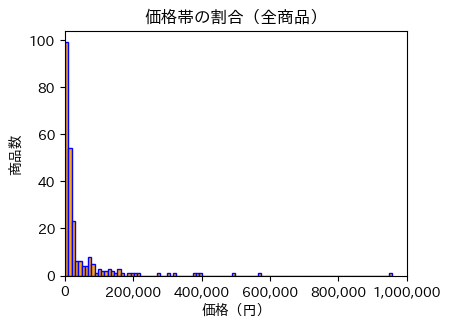

In [93]:
# DataFrameを基にグラフの作成（ヒストグラム）
fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("価格帯の割合（全商品）")
ax1.set_xlim(0,1000000)
ax1.hist(coffeeMaker['price'], bins=100, edgecolor='blue', color='orange')
ax1.set_xlabel('価格（円）')
ax1.set_ylabel('商品数')
ax1.ticklabel_format(style='plain',axis='x')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

fig.savefig("hist1.png")

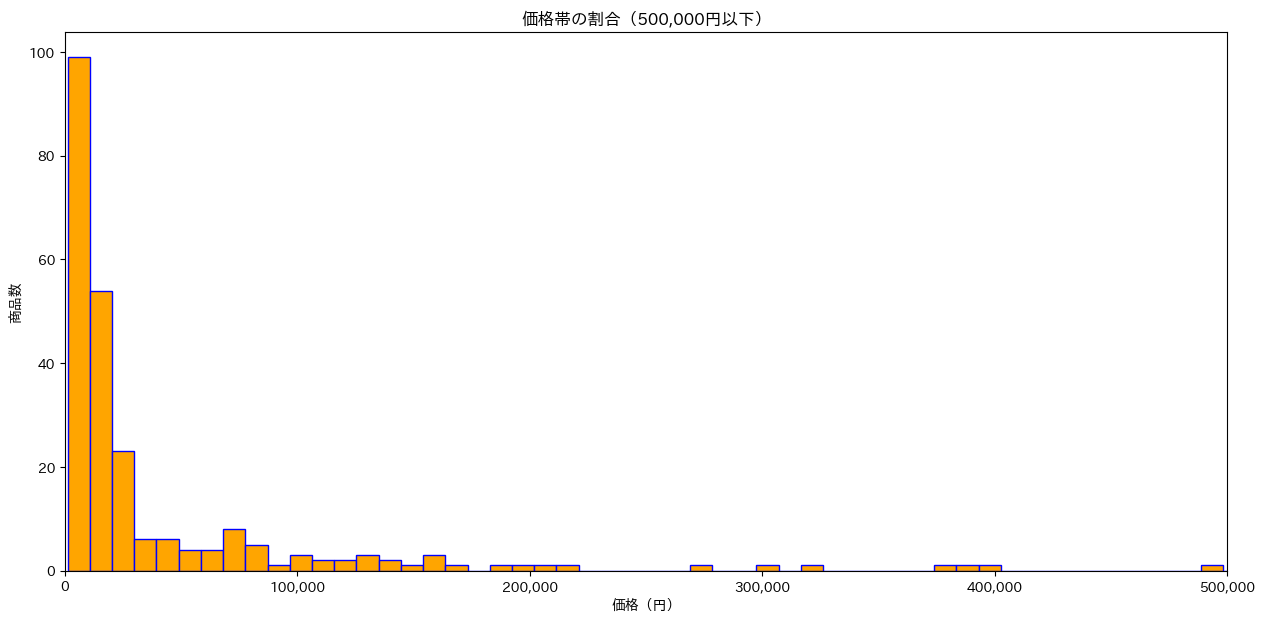

In [94]:
# DataFrameを基にグラフの作成（ヒストグラム）
fig2 = plt.figure(figsize=(15, 7))

ax2 = fig2.add_subplot()
ax2.set_title("価格帯の割合（500,000円以下）")
ax2.set_xlim(0,500000)
ax2.hist(coffeeMaker['price'], bins=100, edgecolor='blue', color='orange')
ax2.set_xlabel('価格（円）')
ax2.set_ylabel('商品数')
ax2.ticklabel_format(style='plain',axis='x')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

fig2.savefig("hist2.png")

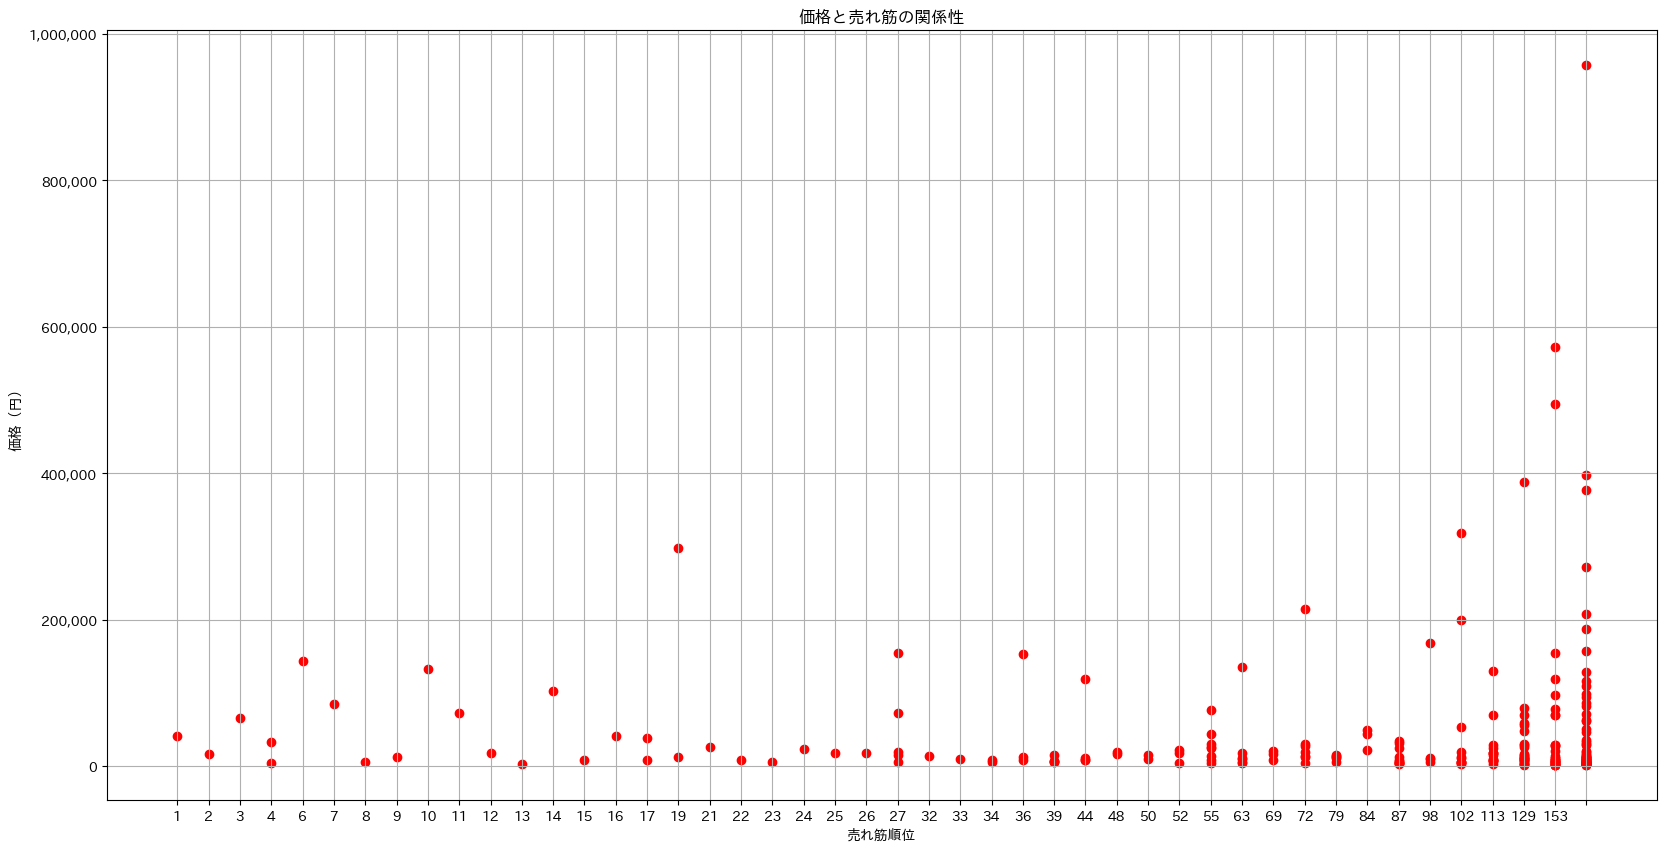

In [95]:
# DataFrameを基にグラフの作成（散布図）
fig3 = plt.figure(figsize=(20, 10))

ax3 = fig3.add_subplot()
ax3.set_title("価格と売れ筋の関係性")
ax3.scatter(coffeeMaker["sell_rank"], coffeeMaker["price"], color="red")
ax3.set_xlabel('売れ筋順位')
ax3.set_ylabel('価格（円）')
ax3.grid(axis = 'x')
ax3.grid(axis = 'y')
ax3.ticklabel_format(style='plain', axis='y')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

fig.savefig("scatter.png")

In [96]:
# 計算用のDataFrame作成
maker_summary = pd.DataFrame(coffeeMaker['maker'].value_counts())
maker_summary.columns = ['counts']

In [97]:
# 平均値や最大値などの計算結果を格納
maker_summary['low'] = 0 
maker_summary['high'] = 0 
maker_summary['average'] = 0 

for i in range(len(maker_summary)):
    low, q25, q50, q75, high = coffeeMaker['price']\
    [coffeeMaker['maker'] == maker_summary.index[i]].quantile(q = [0, 0.25, 0.5, 0.75, 1])
    low_limit = q25 - (q75 - q25)*1.5
    high_limit = q75 + (q75 - q25)*1.5
    maker_summary['low'][i] = int(low)
    maker_summary['high'][i] = int(high)
    maker_summary['average'][i] = int(coffeeMaker['price']\
                                               [coffeeMaker['maker'] == maker_summary.index[i]]\
                                               [coffeeMaker['price'] >= low_limit][coffeeMaker['price']\
                                                                                           <= high_limit].mean())

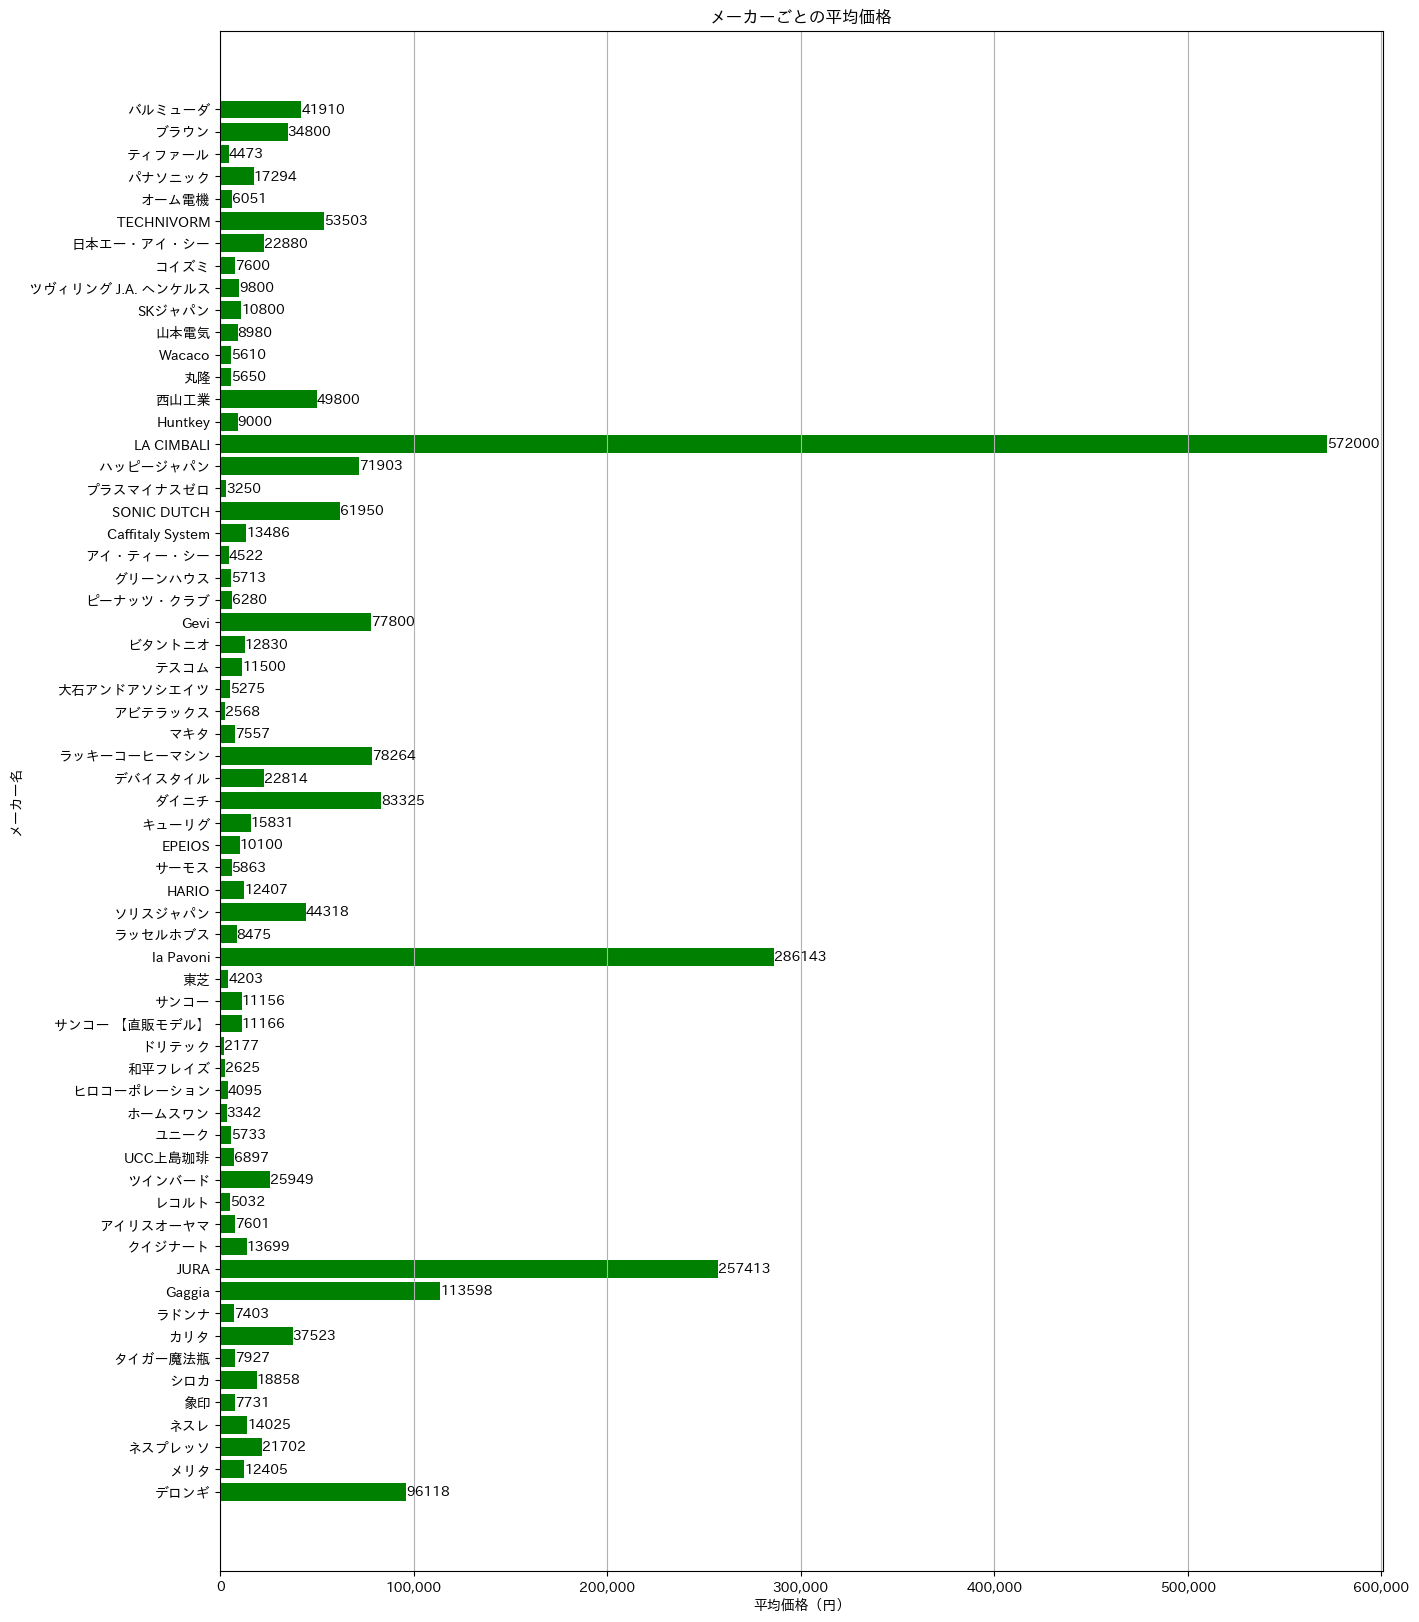

In [98]:
# DataFrameを基にグラフの作成（棒グラフ）
fig4 = plt.figure(figsize=(15, 20))

ax4 = fig4.add_subplot()
ax4.set_title("メーカーごとの平均価格")
ax4.grid(axis = 'x')
ax4.set_xlabel('平均価格（円）')
ax4.set_ylabel('メーカー名')

ax4.bar_label(ax4.barh(maker_summary.index, maker_summary['average'],color="green"))
ax4.ticklabel_format(style='plain',axis='x')
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

fig4.savefig("bar_label.png")

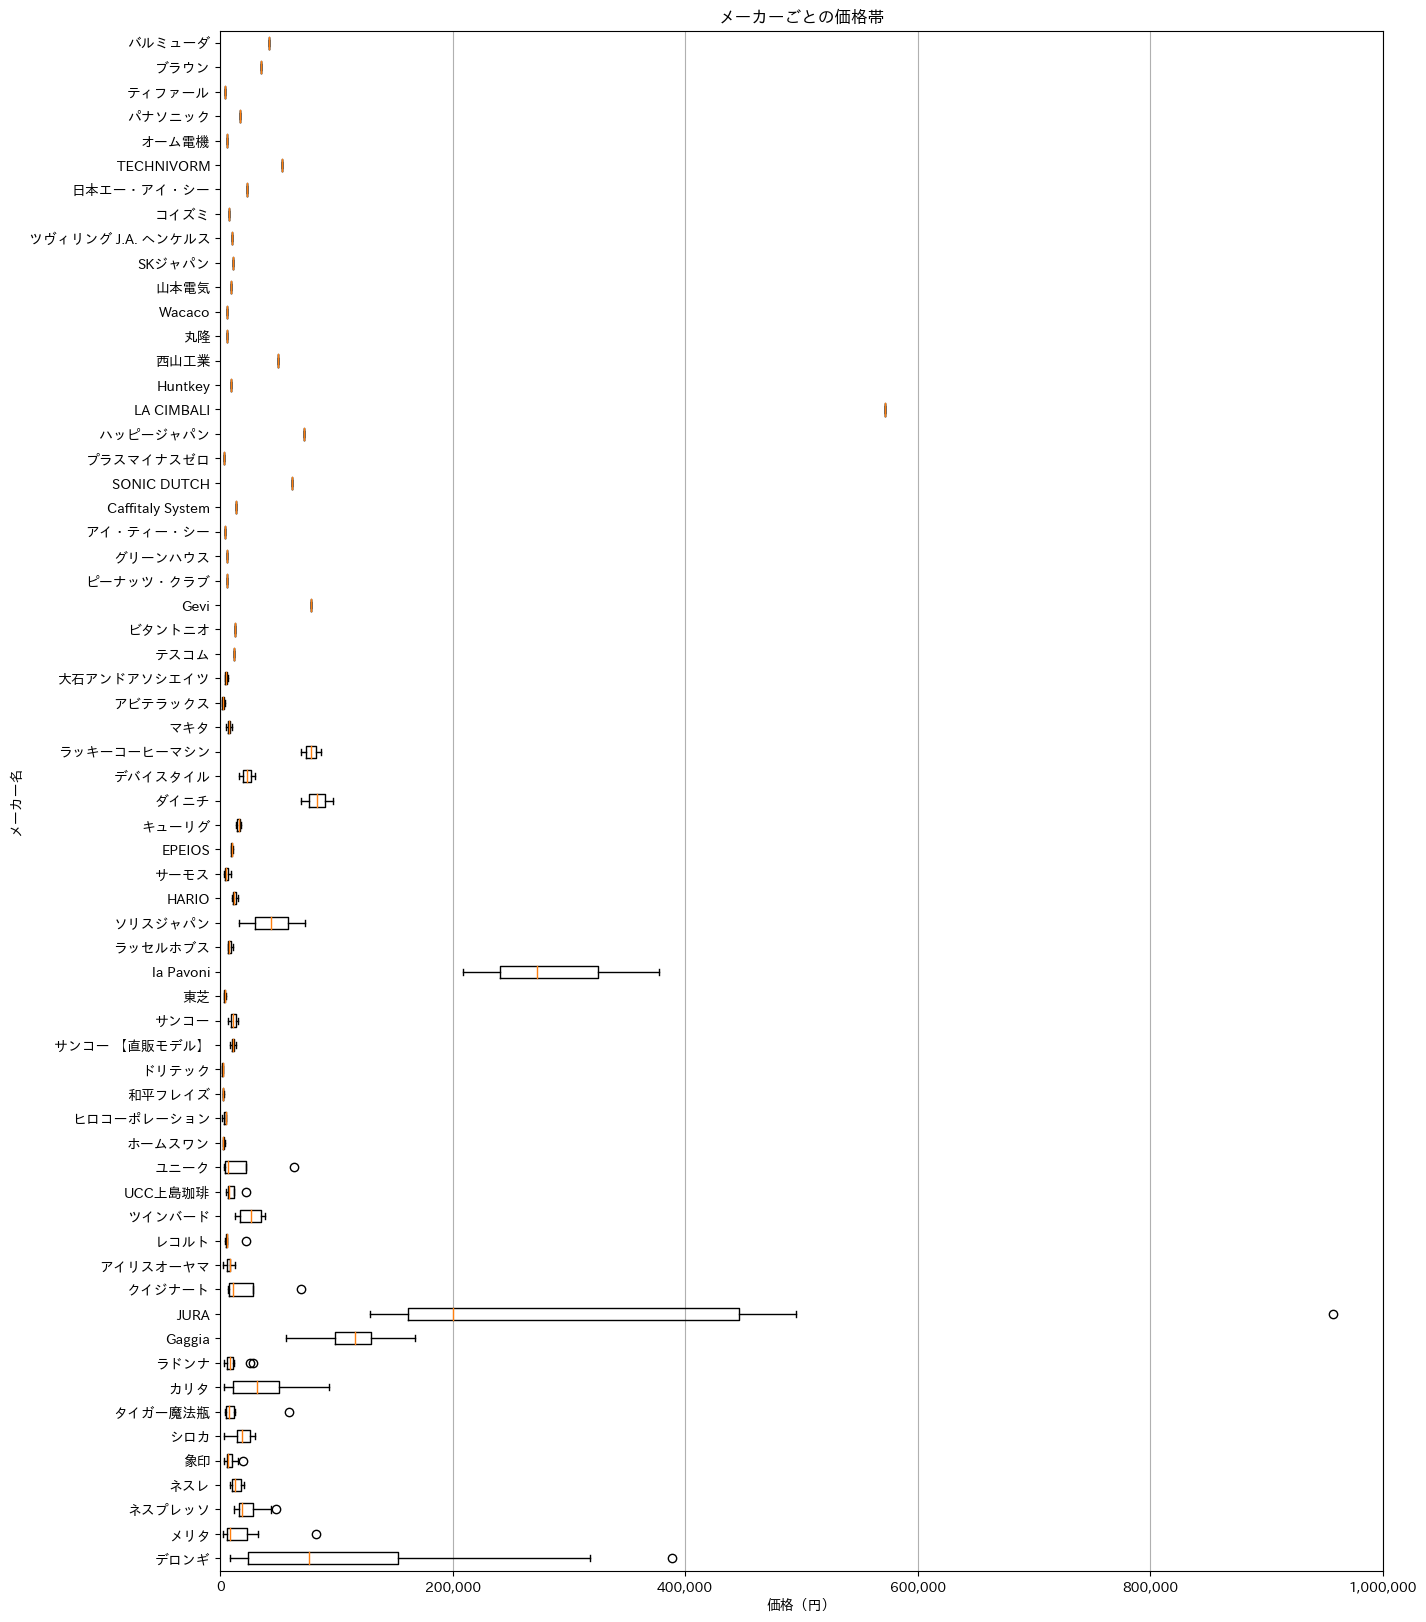

In [99]:
# DataFrameを基にグラフの作成（箱ひげ図）
box_data = []
for i in range(len(maker_summary)):
    box_data.append(list(coffeeMaker['price'][coffeeMaker['maker'] == maker_summary.index[i]]))
box_data = tuple(box_data)

fig5 = plt.figure(figsize=(15, 20))

ax5 = fig5.add_subplot()
ax5.grid(axis = 'x')
ax5.set_title("メーカーごとの価格帯")
ax5.set_xlabel('価格（円）')
ax5.set_ylabel('メーカー名')
ax5.set_xlim(0,1000000)

ax5.boxplot(box_data, vert = False)
ax5.set_yticks(range(1, len(maker_summary)+1), maker_summary.index)
ax5.ticklabel_format(style='plain',axis='x')
ax5.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

fig5.savefig("boxplot.png")

In [100]:
# 売れ筋ランキングから上位100位を抽出
rank_summary = pd.DataFrame(coffeeMaker.sort_values("sell_rank2")[:100]["maker"].value_counts())
rank_summary.columns = ['counts']
key_list = []
value_list = []
for i in rank_summary["counts"].keys():
    key_list.append(i)
for j in rank_summary["counts"]:
    value_list.append(j)

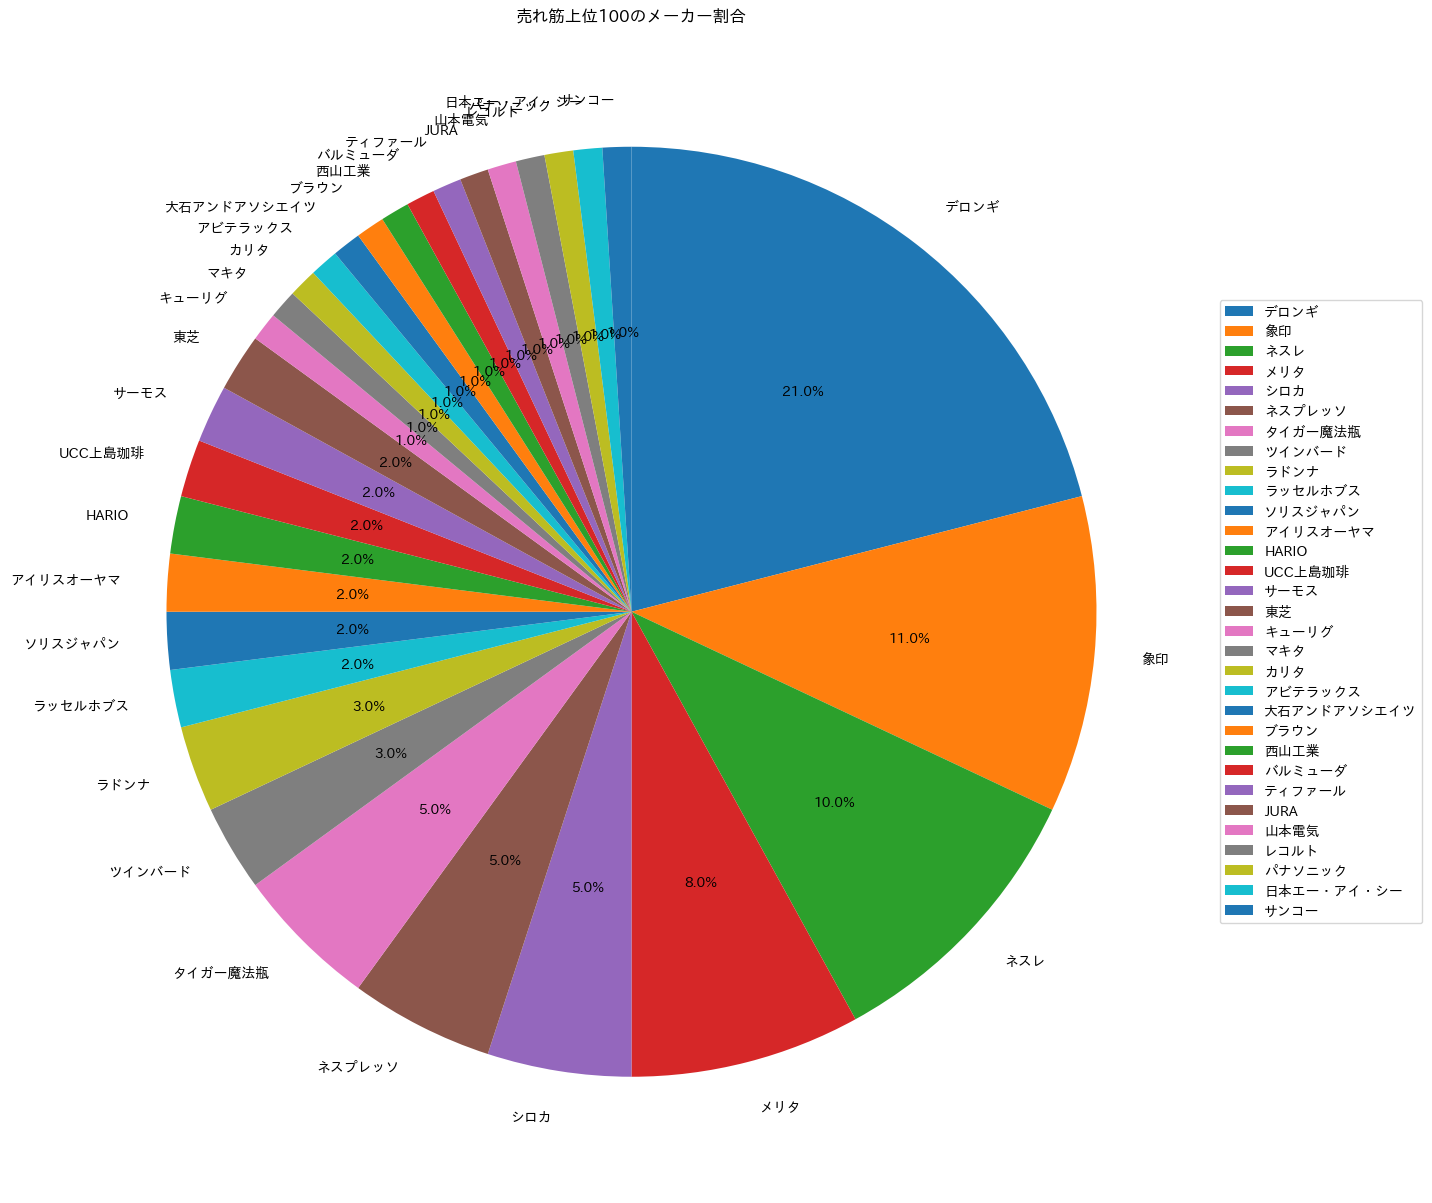

In [101]:
# DataFrameを基にグラフの作成（円グラフ）
fig6 = plt.figure(figsize=(15, 20))

ax6 = fig6.add_subplot()
ax6.pie(value_list, labels=key_list, startangle=90, counterclock=False, autopct='%.1f%%', normalize=True)

ax6.set_title('売れ筋上位100のメーカー割合')
ax6.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

fig6.savefig("pie.png")